# R - statistical programming
This is a short introduction to the basic syntax of the R programming language. This notebook contains the basics for understanding most of the amplicon data analysis workflow.

### Install
If you are a KU student, it is advised to run RStudio through [ERDA](http://www.erda.dk/), where all the packages are already pre-installed. However, if you want to run R locally on your laptop, you have to install it first.
* [First install R](https://www.r-project.org/)
* [Then install RStudio](https://rstudio.com/products/rstudio/download/)

### Learn R
There are many ways to learn R:
* [DataCamp](https://www.datacamp.com/)
* [Code academy](https://www.codecademy.com/learn/learn-r)
* [Coursera](https://www.coursera.org/learn/r-programming)
* [or one of the many youtube videos](https://www.youtube.com/watch?v=fDRa82lxzaU)

* **But most importantly:** Experiment! It takes many(!) hours to become a confindent R user. The most efficient way to get there, is playing around, experimenting.

In [1]:
# This is a comment. The # at the beginning ensures that R will ignore it.

## Working directory
The working directory is the place where R will read and write files/plots to and from.

It is easiest if this is the same place as where the script is located.

In Rstudio, set this by clicking "Session" then "Set Working Directory" then "To Source File Location".

Now R looks for datafiles and saves plots in the same location as where your script is located.

## Basic data types
* **Numerics:** Numbers, e.g 1, 2, 1e3, 0.7, -5.4
* **Characters:** Strings, e.g. "Hello", "world"
* **Logicals:** Boolean, TRUE or FALSE

## Simple arithmetics
R understands simple arithmetics

In [2]:
2+2

[1] 4

In [3]:
5*2/(1-2)^3

[1] -10

## Objects
We can save things in objects (in this case x and y)

In [4]:
x <- 2
y <- "Hello"

In [5]:
# Characters, such as "Hello" are always quoted
# Look what happens if we forget the quotation:
y <- Hello
# It looks for an object called Hello, which does not exist

ERROR: Error in eval(expr, envir, enclos): objekt 'Hello' blev ikke fundet


In [6]:
# We can then use the objects
x * 3

[1] 6

In [7]:
print(y)

[1] "Hello"


In [8]:
# We can change objects
x <- 2 * 5
print(x)

[1] 10


In [9]:
# We can copy objects
k <- x
print(k)

[1] 10


## Functions
Functions take the form of functionName(inputToFunction).

You can always find help on how a function works by typing ?functionName

In [10]:
?mean

## Vectors
We can make vectors with more than one number, character, or logical

In [11]:
# Use the function c() to create a vector
nums <- c(1, 4, 6, 10, 12, 5, 2)
test <- c("Hello", "world.", "Anybody", "there?")

We can do simple operations on these vectors

In [12]:
# Minimum
min(nums)

[1] 1

In [13]:
# Maximum
max(nums)

[1] 12

In [14]:
# Sum
sum(nums)

[1] 40

In [15]:
# Log10
log10(nums)

[1] 0.0000000 0.6020600 0.7781513 1.0000000 1.0791812 0.6989700 0.3010300

In [16]:
# Access the third element
nums[3]
test[3]

[1] 6

[1] "Anybody"

In [17]:
# Append strings
paste("before", test, "after")

[1] "before Hello after"   "before world. after"  "before Anybody after"
[4] "before there? after"

In [60]:
paste("Number", nums, sep=":")

[1] "Number:1"  "Number:4"  "Number:6"  "Number:10" "Number:12" "Number:5" 
[7] "Number:2"

## Factors
Factors are a special type of vector. In a factor the strings/numbers are given "levels" which by default are alphabetical. These levels for example determine the order categorical variables are plotted (as we will see later), and changing this order, means changing the factor levels

In [18]:
x <- factor(c("A", "A", "B", "B"))

In [19]:
x

[1] A A B B
Levels: A B

In [20]:
x <- factor(c("A", "A", "B", "B"), levels = c("B", "A"))
x

[1] A A B B
Levels: B A

## Convert between types
You can convert between types with as.type. Always check the output! Converting might do something unexpected, and is not always reversible

In [21]:
as.character(c(1, 2, 3))

[1] "1" "2" "3"

In [22]:
as.numeric(c("1", "2"))

[1] 1 2

In [23]:
as.factor(c("A", "B", "C"))

[1] A B C
Levels: A B C

In [24]:
as.numeric(c(TRUE, FALSE))

[1] 1 0

In [25]:
as.character(c(TRUE, FALSE))

[1] "TRUE"  "FALSE"

In [26]:
as.character(factor(c("A", "B")))

[1] "A" "B"

In [27]:
as.numeric(factor(c("A", "B")))

[1] 1 2

In [28]:
as.logical(c(1, 2.1, -3, 0))

[1]  TRUE  TRUE  TRUE FALSE

In [29]:
as.numeric(c("A", "B"))

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

[1] NA NA

## Missing data
Missing data is represented by NA. NAs can be mixed with any data type

In [30]:
c(1, 2, 4, NA)

[1]  1  2  4 NA

In [31]:
# Factors ignore NAs
factor(c(1, 2, 4, NA))

[1] 1    2    4    <NA>
Levels: 1 2 4

## Lists
We can make lists, which can contain both numbers, strings, and anything else in the same list

In [32]:
# Use the function list() to create list
mylist <- list(this = 2,
               these = c("salmon", "herring"),
               WhatEverYouWantToCallIt = c(TRUE, TRUE, FALSE))

In [33]:
# Access by name
mylist[["WhatEverYouWantToCallIt"]]

[1]  TRUE  TRUE FALSE

In [34]:
# or by the order (index)
mylist[[2]]

[1] "salmon"  "herring"

## Matrix
A matrix is a two-dimensional array. A bit like an excel spreadsheet with rows and columns. However, all the cells has to contain the same type of data. Either all are numerics, all are characters, or all are logicals.

In [35]:
mat <- matrix(1:9, nrow = 3, ncol = 3)
mat

1,4,7
2,5,8
3,6,9


## Dataframes
Dataframes are objects with columns and rows like a matrix. However, in a data.frame the columns can contain different data.types. This is a very common way to store data, where each row is a sample, and each column is a variable.

In [37]:
# When we read data from a text file it will be imported as a data.frame
# Lets load an external text file with data
df <- read.table("data/mydata.csv", header = TRUE, sep = ";")
# header = TRUE means that the first line in our text file contains the names of the columns
# sep = ";" is because semicolons seperate the columns
print(df)

   var1 var2 group
1     1   32     A
2     2   54     A
3     3   56     A
4     4   10     A
5     5   12     A
6     6   76     B
7     7   65     B
8     8   80     B
9     9   97     B
10   10   92     B


In [38]:
# Use the str() function to check the structure of the dataframe
str(df)

'data.frame':	10 obs. of  3 variables:
 $ var1 : int  1 2 3 4 5 6 7 8 9 10
 $ var2 : int  32 54 56 10 12 76 65 80 97 92
 $ group: Factor w/ 2 levels "A","B": 1 1 1 1 1 2 2 2 2 2


In [39]:
# Access a column in a dataframe with the $ sign
df$group

[1] A A A A A B B B B B
Levels: A B

In data.frames strings are converted to factors, as you can see from the output above. 

### Access data in dataframes
Rows and columns can be accessed with [rows, columns]

Nothing after the comma means that all rows are selected

Nothing before the comma means that all columns are selected

In [40]:
# First row, second column:
df[1, 2]

[1] 32

In [41]:
# First row, all columns:
df[1, ]

var1,var2,group
1,32,A


In [42]:
# All rows, first column
df[, 1]

[1]  1  2  3  4  5  6  7  8  9 10

In [43]:
# First and second row, column named 'var2'
df[c(1, 2), "var2"]

[1] 32 54

In [44]:
# First four rows, columns named 'var1' and 'var2'
df[1:4, c("var1", "var2")]
# 1:4 means integers 1 to 4

var1,var2
1,32
2,54
3,56
4,10


### Add and change data in dataframes

In [45]:
# New columns can be made with the $ sign
df$var2_log10 <- log10(df$var2)

In [46]:
# Change the data in 10th row and second column
df[10, 2] <- 50

In [47]:
# Add 1 to the entire first column
df[, 1] <- df[, 1] + 1

In [48]:
# Input 20 in the second column, only if "group" column is equal to "A"
df[df$group == "A", 2] <- 20
# There are two = signs!

df

var1,var2,group,var2_log10
2,20,A,1.505150
3,20,A,1.732394
4,20,A,1.748188
5,20,A,1.000000
6,20,A,1.079181
7,76,B,1.880814
8,65,B,1.812913
9,80,B,1.903090
10,97,B,1.986772
11,50,B,1.963788


## Saving data
When you click Ctrl+s or you go to File -> Save, you only save the script

You don't save the data (what you see in the upper right corner of RStudio)

If you have run an analysis that took a long time to run, it is nice to save the results so you don't have to rerun the whole thing again.

In [49]:
# To save all data run this:
save.image("Mydata.RData")

In [50]:
# When you open R another day, you load it with the load function
load("Mydata.RData")

## Simple plots

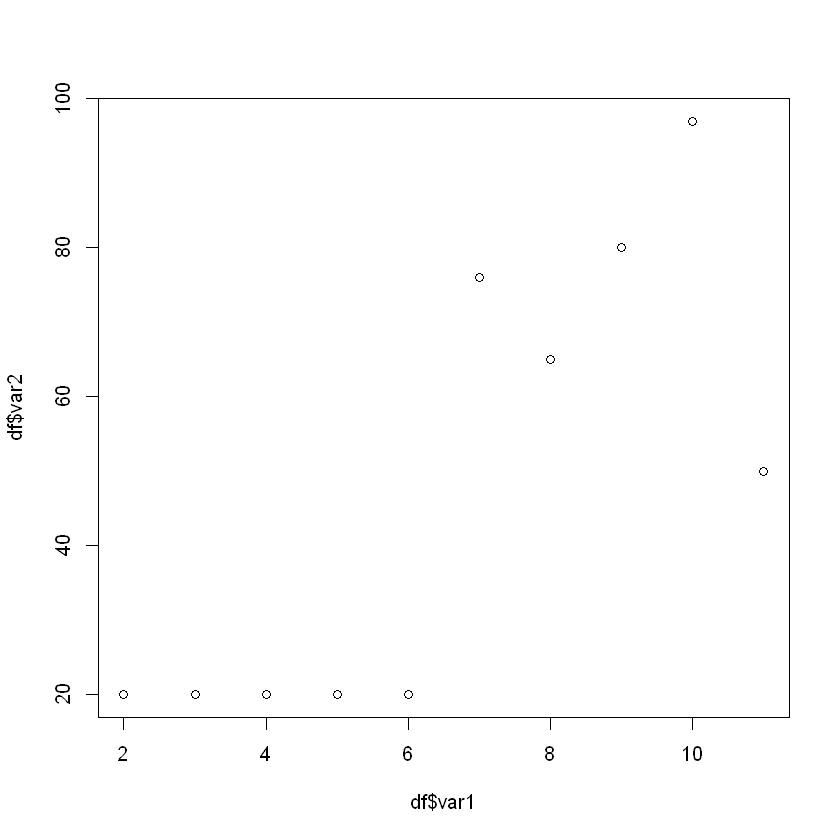

In [51]:
# A simple scatter plot
plot(df$var1, df$var2)

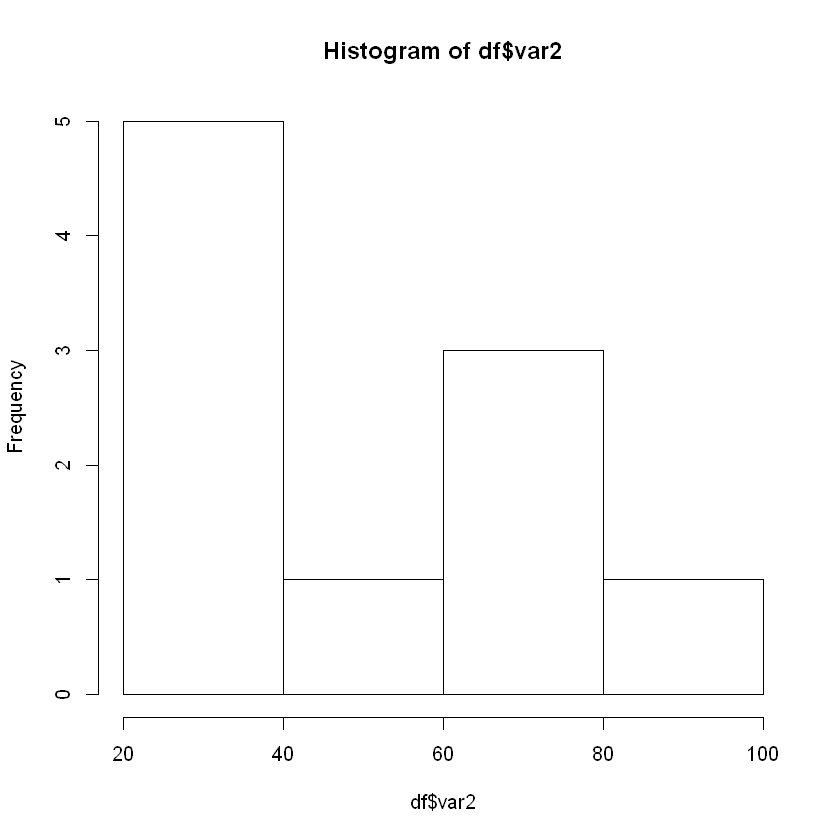

In [52]:
# Histogram
hist(df$var2)

## Packages
#### Load packages

These contain convenient functions.

When library(package name) is run, we can use functions from the package

It has to be run each time we start up R

In [53]:
# ggplot2 is a package for making nice plots.
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"

#### Install packages
Packages are usually installed with install.packages("PackageName"). This only has to be done one time.

In [ ]:
install.packages("car")

The above only works for packages on [CRAN](https://cran.r-project.org/web/packages/available_packages_by_name.html). However, some bioinformatics packages are on [BioConductor](https://www.bioconductor.org/install/), which has to be installed differently (see link). Some packages are only on GitHub and has to be installed through there (see for example [this one](https://github.com/Russel88/MicEco)).

## Simple ggplotting
ggplot2 is a great packages for making neat plots. There is a notebook on the details of ggplot2, but below is described how to make a simple plot.

Let's make a similar scatterplot as above, but with ggplot2

A ggplot is always made by starting with the ggplot(data, aes(...)) line
* data is a data.frame that contains the data to plot.
* The aes() function are the aesthetics. Here we tell ggplot which columns in the data.frame to use for plotting.
* geom_point() tells ggplot to plot data as points.

In [55]:
# First define and save the plot:
p <- ggplot(df, aes(x = var1, y = var2)) +
  geom_point()

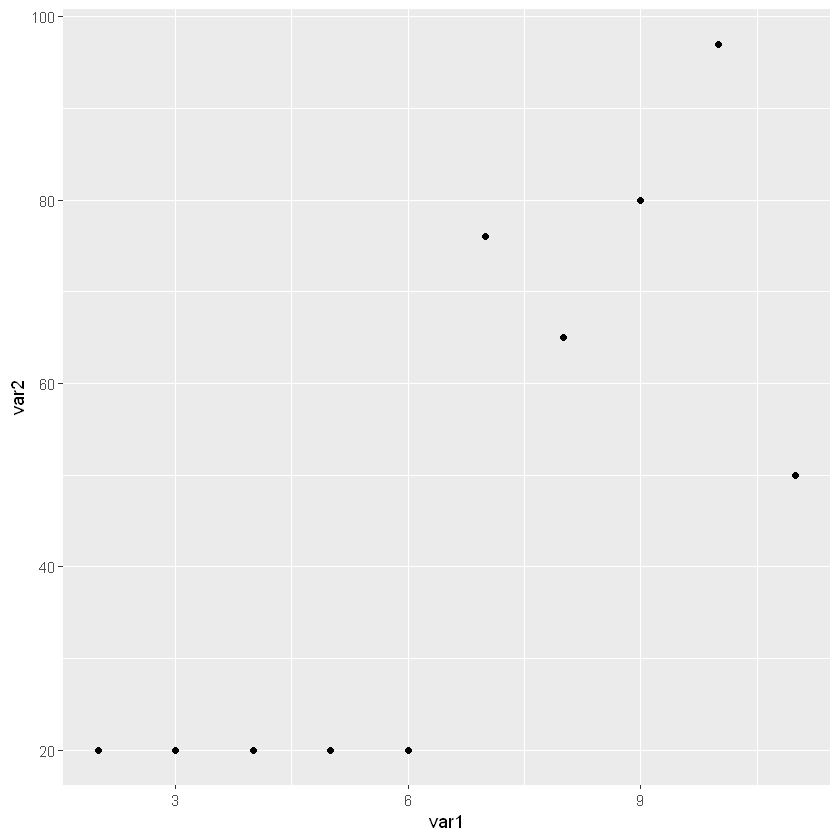

In [56]:
# Then view the plot:
p

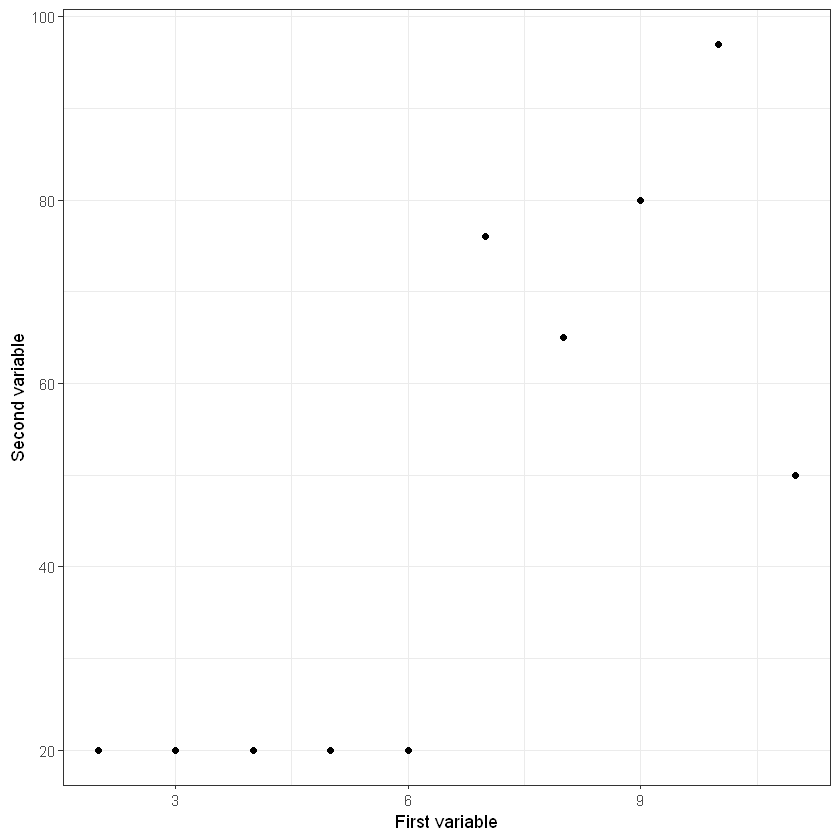

In [57]:
# Extra things can be added with +'s
p <- ggplot(df, aes(x = var1, y = var2)) +
  geom_point() +
  xlab("First variable") +
  ylab("Second variable") +
  theme_bw() # Remove the grey background
p

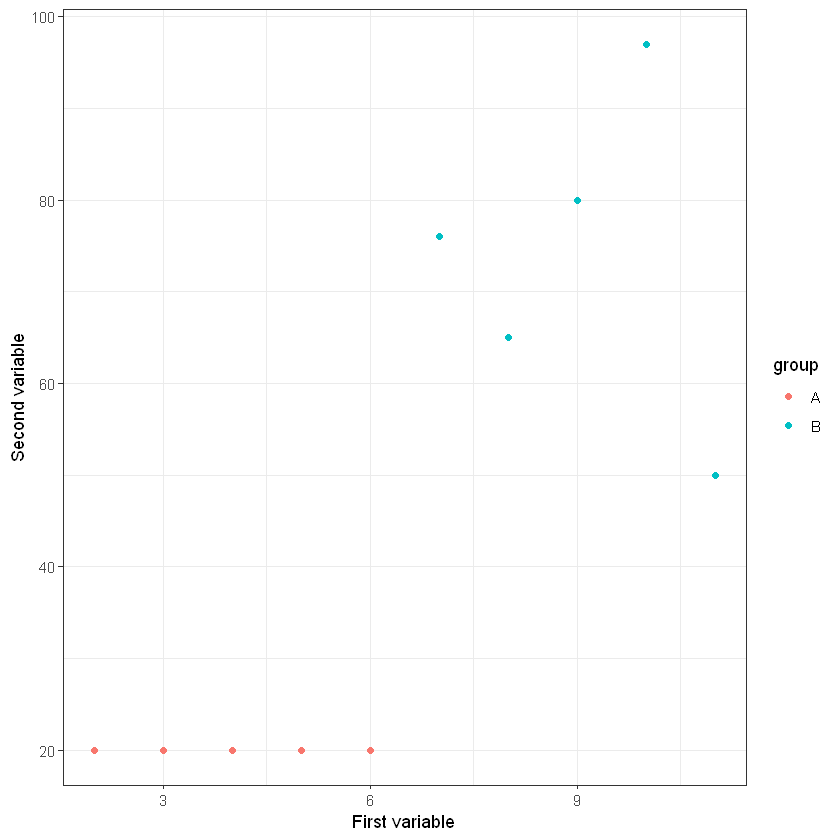

In [58]:
# Color by group
p <- ggplot(df, aes(x = var1, y = var2, color = group)) +
  geom_point() +
  xlab("First variable") +
  ylab("Second variable") +
  theme_bw()
p

In [59]:
# Save the plot
ggsave(filename = "MyFirstGGplot.png", plot = p, 
       width = 10, height = 6, units = "cm")